In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm

In [2]:
train=pd.read_csv(r"UNSW_NB15_training-set.csv", na_values=["-"])  # service column contains "-" so to replace it with NaN, na_values is used 
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [3]:
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

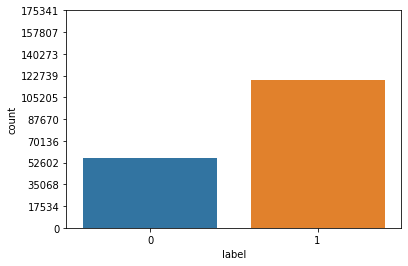

In [4]:
total = len(train)*1.
ax=sns.countplot(x="label", data=train)
# for p in ax.patches:
#     print(p)
#     ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

# #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
# print(ax.yaxis.get_majorticklocs())
# #adjust the ticklabel to the desired format, without changing the position of the ticks. 
# ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
# plt.savefig('class_label.png')
plt.show()

In [5]:
cat_feature = train.select_dtypes(include=['category', object]).columns
cat_feature

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

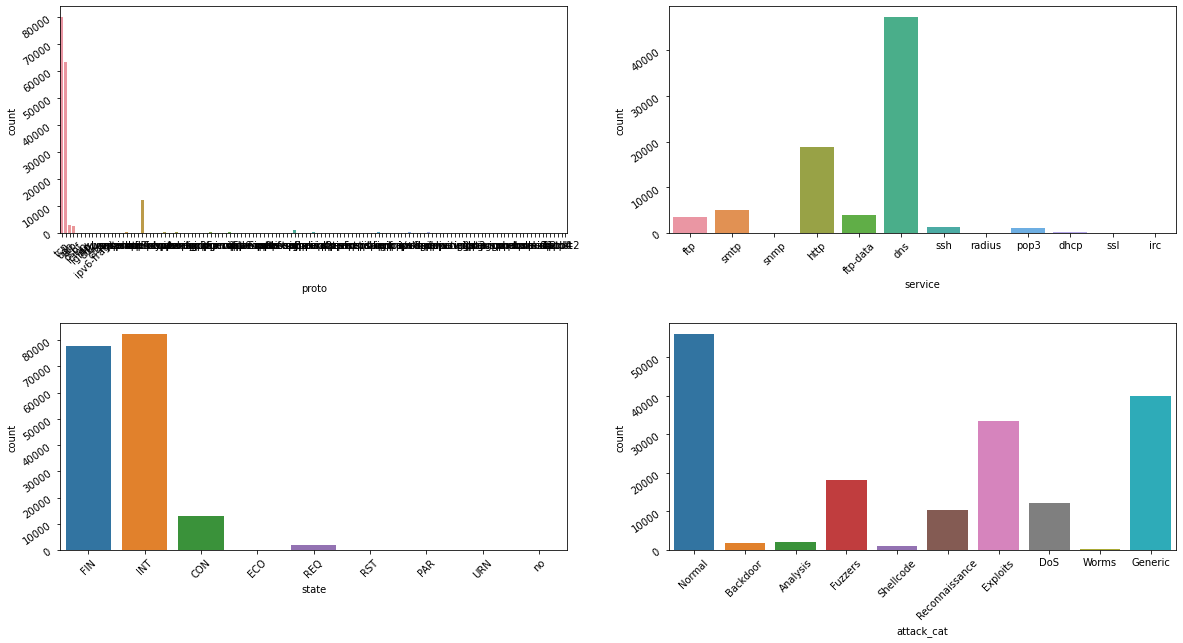

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.4)
for col, subplot in zip(cat_feature, ax.flatten()):
    sns.countplot(train[col], ax=subplot)
    for labelx, labely in zip(subplot.get_xticklabels(), subplot.get_yticklabels()):
            labelx.set_rotation(45)
            labely.set_rotation(35) 
plt.show()


# for col in cat_feature:
#     sns.countplot(train[col],data=train)
#     plt.show()

# 3.2 visualizing numerical data and its distribution


In [7]:
num_features = train.drop(['id','label'], axis=1).select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
print(num_features)
print(num_features.size)

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')
39


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

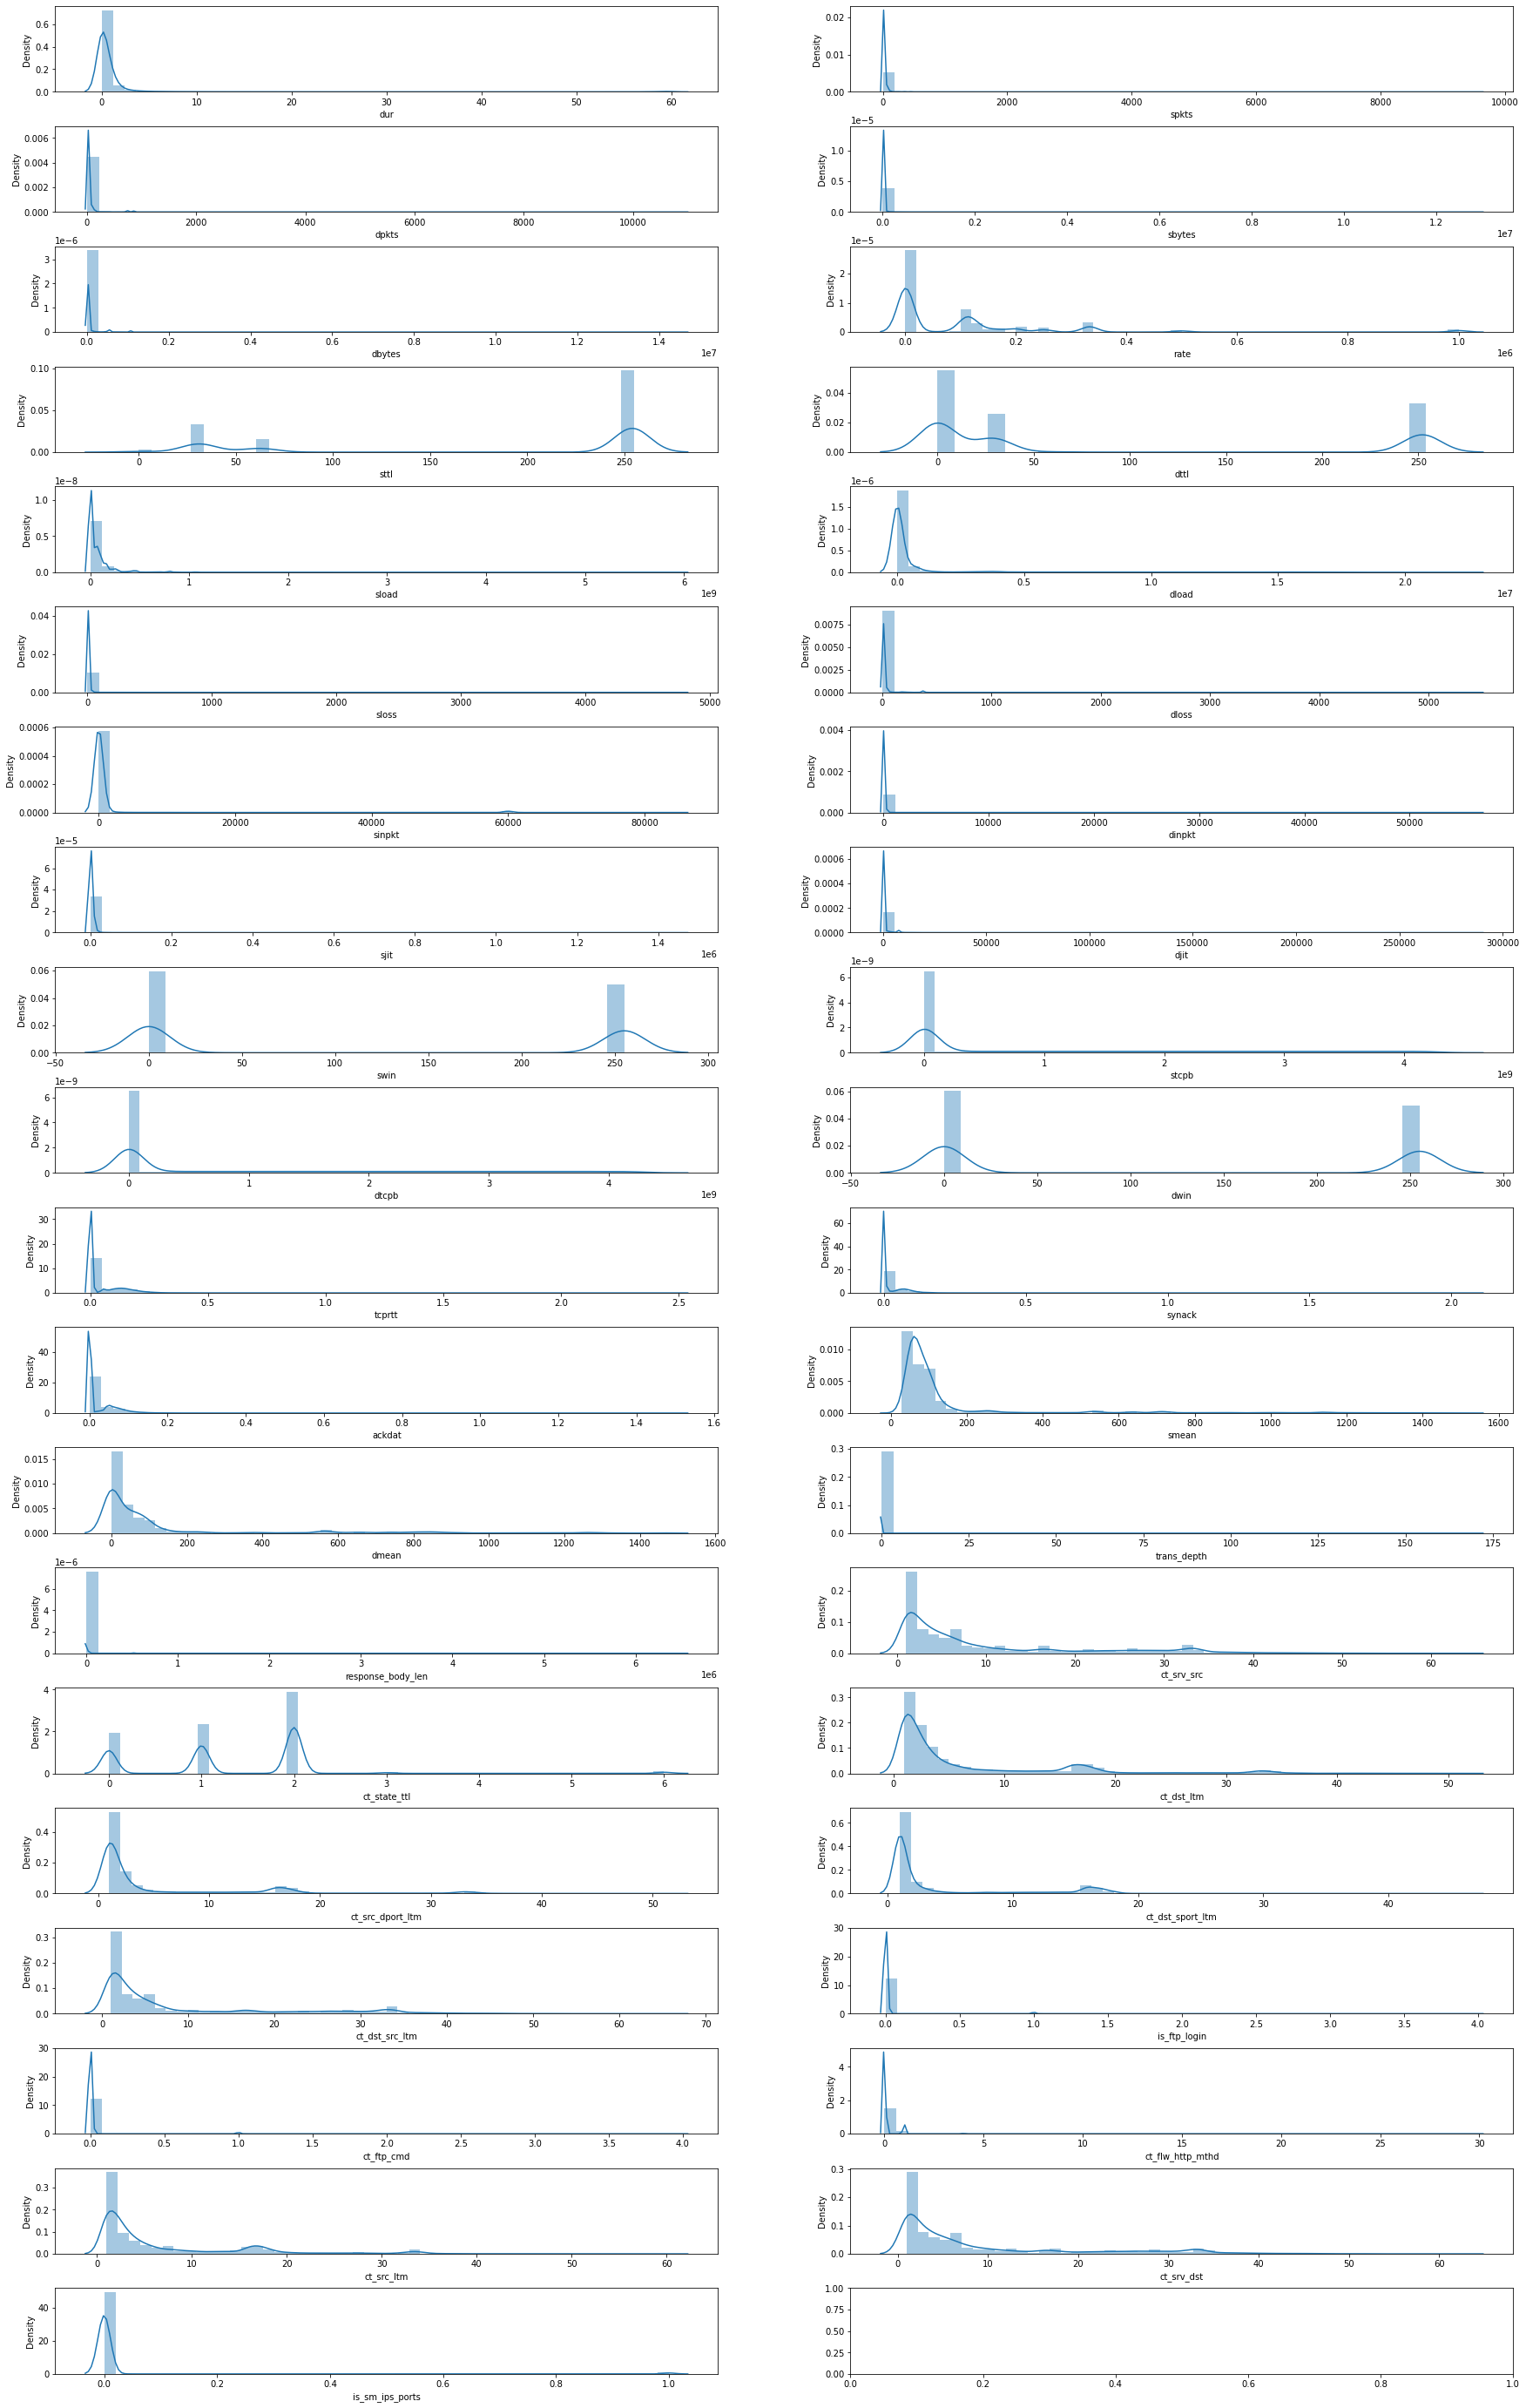

In [8]:
fig, ax = plt.subplots(20, 2, figsize=(30, 50))
plt.subplots_adjust(hspace = 0.4)
for col, splot in zip(num_features, ax.flatten()):
    sns.distplot(train[col], ax=splot)
plt.savefig('num_f.png')
plt.show()

## 3.3 Correlation of data .. discards object (categorical) data .. only accepts integer or float

In [9]:
train_corr = train.corr()  
print(type(train_corr))
train_corr.dtypes

<class 'pandas.core.frame.DataFrame'>


id                   float64
dur                  float64
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sttl                 float64
dttl                 float64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                 float64
stcpb                float64
dtcpb                float64
dwin                 float64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
ct_srv_src           float64
ct_state_ttl         float64
ct_dst_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
is_ftp_login  

In [10]:
train_corr = train.corr()

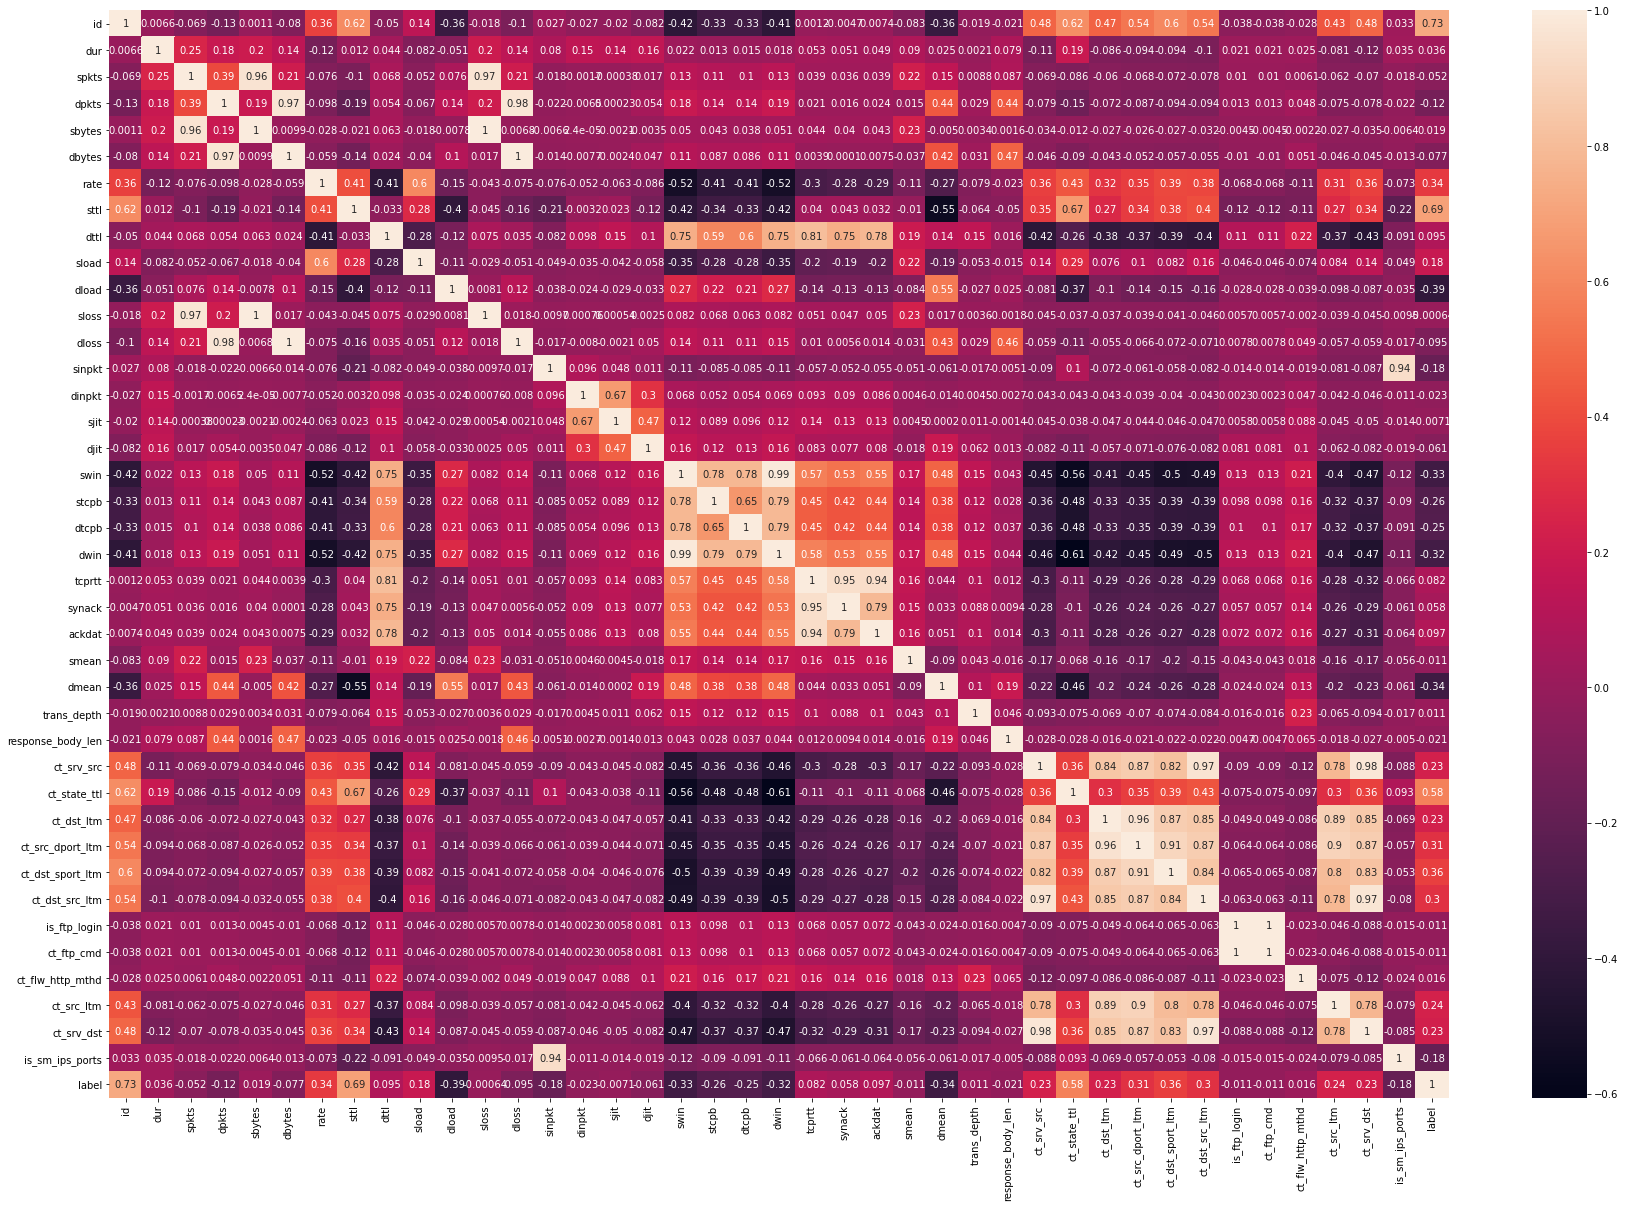

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(train_corr, annot=True)
plt.savefig('corr_mat.png')
plt.show()

# from here

In [12]:
high_corr_var=np.where(train_corr>0.95)

In [13]:
high_corr_var

(array([ 0,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,  7,  8,
         9, 10, 11, 11, 11, 12, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 28, 28, 29, 30, 30, 31, 31, 32,
        33, 33, 33, 34, 34, 35, 35, 36, 37, 38, 38, 38, 39, 40],
       dtype=int64),
 array([ 0,  1,  2,  4, 11,  3,  5, 12,  2,  4, 11,  3,  5, 12,  6,  7,  8,
         9, 10,  2,  4, 11,  3,  5, 12, 13, 14, 15, 16, 17, 20, 18, 19, 17,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 33, 38, 29, 30, 31, 30, 31, 32,
        28, 33, 38, 34, 35, 34, 35, 36, 37, 28, 33, 38, 39, 40],
       dtype=int64))

In [14]:
temp = []
for x, y in zip(*high_corr_var):
    if x!=y and x<y:
        print(train_corr.columns[x], train_corr.columns[y])
        temp.append((train_corr.columns[x],train_corr.columns[y]))
high_corr_var=temp

spkts sbytes
spkts sloss
dpkts dbytes
dpkts dloss
sbytes sloss
dbytes dloss
swin dwin
ct_srv_src ct_dst_src_ltm
ct_srv_src ct_srv_dst
ct_dst_ltm ct_src_dport_ltm
ct_dst_src_ltm ct_srv_dst
is_ftp_login ct_ftp_cmd


In [15]:
high_corr_var

[('spkts', 'sbytes'),
 ('spkts', 'sloss'),
 ('dpkts', 'dbytes'),
 ('dpkts', 'dloss'),
 ('sbytes', 'sloss'),
 ('dbytes', 'dloss'),
 ('swin', 'dwin'),
 ('ct_srv_src', 'ct_dst_src_ltm'),
 ('ct_srv_src', 'ct_srv_dst'),
 ('ct_dst_ltm', 'ct_src_dport_ltm'),
 ('ct_dst_src_ltm', 'ct_srv_dst'),
 ('is_ftp_login', 'ct_ftp_cmd')]

# # till here .. whats use

## sbytes , sloss , spkts 

In [16]:
print(train[['sbytes','sloss','spkts']].corr())        # ??????????????  why these 3 


          sbytes     sloss     spkts
sbytes  1.000000  0.996109  0.963791
sloss   0.996109  1.000000  0.971069
spkts   0.963791  0.971069  1.000000


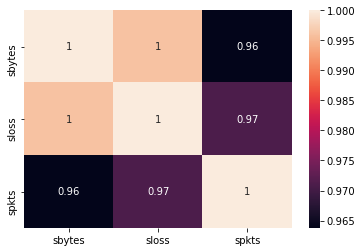

In [18]:
sns.heatmap(train[['sbytes','sloss','spkts']].corr(), annot=True)
plt.show()


- so we can drop column sbyte from above representation.
- From this visualization we can see that both have high correlation and same distribution with other columns

## dbytes     dloss     dpkts

In [19]:
print(train[['dbytes','dloss','dpkts']].corr())

          dbytes     dloss     dpkts
dbytes  1.000000  0.996504  0.971907
dloss   0.996504  1.000000  0.978636
dpkts   0.971907  0.978636  1.000000


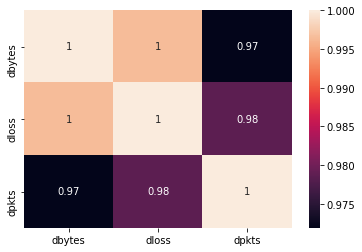

In [21]:
sns.heatmap(train[['dbytes','dloss','dpkts']].corr(), annot=True)
plt.show()

- so we can drop column dbytes from above representation.
- From this visualization we can see that both have high correlation and same distribution with other columns

## ct_dst_src_ltm  ct_srv_src  ct_srv_dst

In [22]:
print(train[['ct_dst_src_ltm','ct_srv_src','ct_srv_dst']].corr())

                ct_dst_src_ltm  ct_srv_src  ct_srv_dst
ct_dst_src_ltm        1.000000    0.967138    0.972370
ct_srv_src            0.967138    1.000000    0.980323
ct_srv_dst            0.972370    0.980323    1.000000


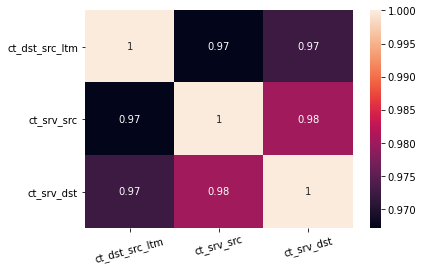

In [23]:
obj=sns.heatmap(train[['ct_dst_src_ltm','ct_srv_src','ct_srv_dst']].corr(), annot=True)
for labelx, labely in zip(obj.get_xticklabels(), obj.get_yticklabels()):
    labelx.set_rotation(15)
    labely.set_rotation(0)
plt.show()

- we can drop column ct_srv_dst
- From this visualization we can see that three columns are having high correlation and same distribution

## swin     dwin

In [24]:
print(train[['swin','dwin']].corr())

         swin     dwin
swin  1.00000  0.99014
dwin  0.99014  1.00000


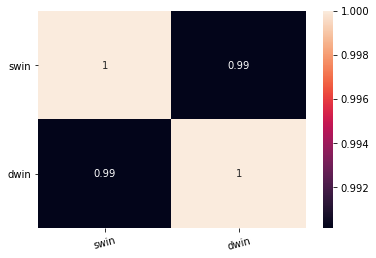

In [25]:
obj=sns.heatmap(train[['swin', 'dwin']].corr(), annot=True)
for labelx, labely in zip(obj.get_xticklabels(), obj.get_yticklabels()):
    labelx.set_rotation(15)
    labely.set_rotation(0)
plt.show()

## is_ftp_login  ct_ftp_cmd

In [28]:
print(train[['is_ftp_login','ct_ftp_cmd']].corr())

              is_ftp_login  ct_ftp_cmd
is_ftp_login           1.0         1.0
ct_ftp_cmd             1.0         1.0


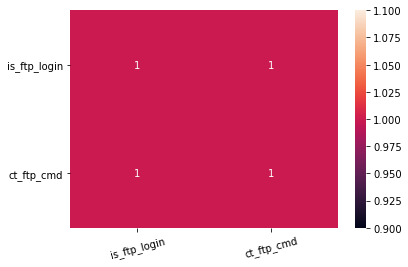

In [27]:
obj=sns.heatmap(train[['is_ftp_login', 'ct_ftp_cmd']].corr(), annot=True)
for labelx, labely in zip(obj.get_xticklabels(), obj.get_yticklabels()):
    labelx.set_rotation(15)
    labely.set_rotation(0)
plt.show()

- we can drop ct_ftp_cmd. 
- From this visualization we can see that both have high correlation and same distribution

# 3.5 EDA conclusion

#### we can drop the 5 columns mentioned from above analysis which are highly correlated
- sbyte and dbytes
- ct_srv_dst
- ct_ftp_cmd
- dwin

In [29]:
cols_to_drop = ['sbytes', 'dbytes','ct_srv_dst', 'ct_ftp_cmd', 'dwin']

In [30]:
train.drop(columns=cols_to_drop, inplace=True)
train.shape

(175341, 40)

In [31]:
test=pd.read_csv(r"UNSW_NB15_testing-set.csv", na_values=["-"])
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,NaN,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,NaN,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,NaN,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,NaN,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,NaN,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,NaN,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,NaN,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,NaN,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,NaN,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [32]:
print(train.shape, test.shape)

(175341, 40) (82332, 45)


In [33]:
test.drop(columns=cols_to_drop, inplace=True)
test.shape

(82332, 40)

In [34]:
df=pd.concat([train,test], sort=False, axis=0)
df

,id,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,74.087490,252,254,...,1,1,1,1,0,0,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,78.473372,62,252,...,1,1,1,2,0,0,1,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,14.170161,62,252,...,2,1,1,3,0,0,2,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,13.677108,62,252,...,2,1,1,3,1,0,2,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,33.373826,254,252,...,2,2,1,40,0,0,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,NaN,INT,2,0,200000.005100,254,0,...,2,1,1,2,0,0,2,0,Normal,0
82328,82329,1.106101,tcp,NaN,FIN,20,8,24.410067,254,252,...,2,1,1,1,0,0,3,0,Normal,0
82329,82330,0.000000,arp,NaN,INT,1,0,0.000000,0,0,...,1,1,1,1,0,0,1,1,Normal,0
82330,82331,0.000000,arp,NaN,INT,1,0,0.000000,0,0,...,1,1,1,1,0,0,1,1,Normal,0


In [35]:
def col_gen (labels, col_name, df):
    for label in labels:
        df[label]=np.where(df[col_name]==label,1,0)

In [36]:
df.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm          0
ct_dst_src_ltm            0
is_ftp_login              0
ct_flw_http_mthd    

In [38]:
categorical_cols = df.select_dtypes(include=object).columns

In [39]:
for col in categorical_cols:
    print(df[col].value_counts())

tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
netblt       131
rdp          131
igmp          48
icmp          15
rtp            1
Name: proto, Length: 133, dtype: int64
dns         68661
http        27011
smtp         6909
ftp-data     5391
ftp          4980
pop3         1528
ssh          1506
dhcp          120
snmp          109
ssl            86
irc            30
radius         21
Name: service, dtype: int64
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
no          1
URN         1
PAR         1
Name: state, dtype: int64
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64


In [45]:
services=df["service"].value_counts().head(7)#.index
print(services.dtype)

int64


In [46]:
print(df.shape)

(257673, 47)


In [47]:
col_gen(services,"service", df)

In [48]:
print(df.shape)

(257673, 47)


In [49]:
df.drop(labels="service", axis=1, inplace= True)

In [50]:
print(df.shape)

(257673, 46)


In [51]:
states=df["state"].value_counts().head(4)#.index
print(states)

FIN    117164
INT    116438
CON     20134
REQ      3833
Name: state, dtype: int64


In [52]:
print(df.shape)

(257673, 46)


In [53]:
col_gen(states,"state", df)


In [54]:
print(df.shape)

(257673, 50)


In [55]:
df.drop(labels="state", axis=1, inplace= True)


In [56]:
print(df.shape)

(257673, 49)


In [57]:
protocols=df["proto"].value_counts().head(6)#.index
print(protocols)


tcp     123041
udp      92701
unas     15599
arp       3846
ospf      3271
sctp      1474
Name: proto, dtype: int64


In [58]:
print(df.shape)

(257673, 49)


In [59]:
col_gen(protocols,"proto", df)


In [60]:
print(df.shape)

(257673, 55)


In [61]:
df.drop(labels="proto", axis=1, inplace= True)


In [62]:
print(df.shape)

(257673, 54)


In [63]:
attack_cats=df["attack_cat"].value_counts().head(6)#.index
print(attack_cats)


Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Name: attack_cat, dtype: int64


In [64]:
print(df.shape)

(257673, 54)


In [65]:
col_gen(attack_cats,"attack_cat", df)


In [66]:
print(df.shape)

(257673, 60)


In [67]:
df.drop(labels="attack_cat", axis=1, inplace= True)


In [60]:
print(df.shape)


(257673, 59)


In [68]:
df.columns

Index([               'id',               'dur',             'spkts',
                   'dpkts',              'rate',              'sttl',
                    'dttl',             'sload',             'dload',
                   'sloss',             'dloss',            'sinpkt',
                  'dinpkt',              'sjit',              'djit',
                    'swin',             'stcpb',             'dtcpb',
                  'tcprtt',            'synack',            'ackdat',
                   'smean',             'dmean',       'trans_depth',
       'response_body_len',        'ct_srv_src',      'ct_state_ttl',
              'ct_dst_ltm',  'ct_src_dport_ltm',  'ct_dst_sport_ltm',
          'ct_dst_src_ltm',      'is_ftp_login',  'ct_flw_http_mthd',
              'ct_src_ltm',   'is_sm_ips_ports',             'label',
                     68661,               27011,                6909,
                      5391,                4980,                1528,
                    

In [69]:
Y=df["label"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: label, Length: 257673, dtype: int64

In [70]:
X = df.drop(labels="label", axis=1)

In [71]:
Y = Y.values.reshape(-1,1)

In [72]:
print(Y.shape)

(257673, 1)


In [73]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [74]:
print(X.shape, Y.shape)

(257673, 58) (257673, 1)


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [76]:
print(X_train.shape)
X_train

(193254, 58)


array([[ 1.35690613, -0.20867941, -0.13076536, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40656547,  0.39162937,  0.03106254, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25899038, -0.20867907, -0.13076536, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.80973834, -0.20867907, -0.13076536, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45622843, -0.1418459 , -0.08663048, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.43029695, -0.20867874, -0.13076536, ...,  0.        ,
         0.        ,  0.        ]])

In [77]:
print(Y_train.shape)

(193254, 1)


## logistic regression

In [78]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42)

In [79]:
log_clf.fit(X_train, Y_train)
y_pred=log_clf.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.metrics import f1_score
score = f1_score(Y_test, y_pred)
score

0.9191776833032439

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[18022,  5179],
       [ 1760, 39458]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
accs=accuracy_score(Y_test,y_pred)
accs

0.8922833325571649

## SVM

In [83]:
from sklearn.svm import SVC
svm_clf=SVC()

In [85]:
svm_clf.fit(X_train, Y_train)
y_pred = svm_clf.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [86]:
from sklearn.metrics import f1_score
score=f1_score(Y_test, y_pred)
score

0.94901614289808

In [87]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[20408,  2793],
       [ 1477, 39741]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score
accs=accuracy_score(Y_test,y_pred)
accs

0.9337152082460144

## SVM

In [89]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [90]:
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))

In [91]:
svm_clf.fit(X_train, Y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [92]:
y_pred=svm_clf.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

In [93]:
from sklearn.metrics import f1_score
score1=f1_score(Y_test, y_pred)
score1

0.9208209149734257

In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[16804,  6397],
       [  590, 40628]], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score
accs1=accuracy_score(Y_test,y_pred)
accs1

0.8915382107763238

## Neural network

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [97]:
classifier=Sequential() 

we don't set conditions for input layer

In [98]:
classifier.add(Dense(units = 30, kernel_initializer = "he_uniform", input_dim = 58, activation = "relu"))      # 1st hidden layer

In [99]:
classifier.add(Dropout(0.3))

In [100]:
classifier.add(Dense(units = 30, kernel_initializer = "he_uniform",activation = "relu"))    # 2nd hidden layer

In [101]:
classifier.add(Dropout(0.3))

In [102]:
classifier.add(Dense(units = 30, kernel_initializer = "he_uniform", activation = "relu"))    # 3rd hidden layer

In [103]:
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))   # output layer   #activation = "softmax" if we had more than 2 classes in target

In [104]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])                    #loss = "categorical_crossentropy"  if more than 2 classes in target

In [105]:
classifier.fit(X_train, Y_train, batch_size = 100, epochs = 10, validation_data=(X_test, Y_test))       #batch size tells that after training that many examples the parameters will be updated

Epoch 1/10
1933/1933 [==============================] - 4s 2ms/step - loss: 0.3478 - accuracy: 0.8465 - val_loss: 0.1715 - val_accuracy: 0.9202

In [106]:
ypred=classifier.predict(X_test)
ypred=(ypred>0.5)
ypred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [107]:
from sklearn.metrics import f1_score
score2=f1_score(Y_test, y_pred)
score2

0.9208209149734257

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,ypred)
cm

array([[21835,  1366],
       [ 2133, 39085]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score
accs2=accuracy_score(Y_test,ypred)
accs2

0.9456837268507738

In [110]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic Regression", "{0:.4}".format(accs)])
x.add_row(["Linear SVM", "{0:.4}".format(accs1)])
x.add_row(["Neural Network", "{0:.4}".format(accs2)])
print(x)

+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
| Logistic Regression |  0.9337  |
|      Linear SVM     |  0.8915  |
|    Neural Network   |  0.9457  |
+---------------------+----------+
